# Beta Distribution: Visualization and Use Cases

The **Beta distribution** is a continuous probability distribution defined on the interval [0, 1]. It's parameterized by two shape parameters, α (alpha) and β (beta).

## Why This Notebook?

In our confounding simulations (`causalbiolab.simulation.confounding`), we use:

```python
cell_cycle = np.random.beta(2, 5, n_cells)
```

This creates a **right-skewed** distribution where most cells are in early cell cycle phases (G1), which is biologically realistic.

## Table of Contents

1. [Basic Visualization](#1-basic-visualization)
2. [Understanding α and β Parameters](#2-understanding-α-and-β-parameters)
3. [Common Shapes and Use Cases](#3-common-shapes-and-use-cases)
4. [Bayesian Statistics: Beta as Conjugate Prior](#4-bayesian-statistics-beta-as-conjugate-prior)
5. [Quick Reference](#5-quick-reference)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

## 1. Basic Visualization

Let's visualize the Beta(2, 5) distribution used in our cell cycle simulation.

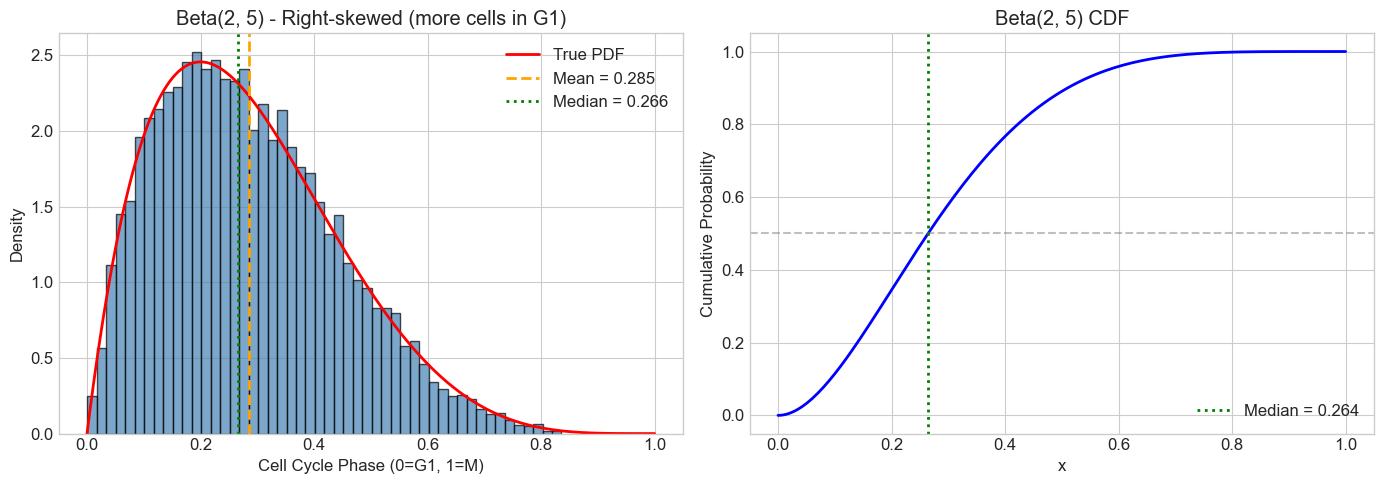

Beta(2, 5) Statistics:
  Mean:     0.2857
  Median:   0.2644
  Variance: 0.0255
  Mode:     0.2000


In [3]:
# The distribution we use in simulate_cell_cycle_confounding()
alpha, beta = 2, 5

# Generate samples
np.random.seed(42)
samples = np.random.beta(alpha, beta, 10000)

# Create x values for PDF
x = np.linspace(0, 1, 200)
pdf = stats.beta.pdf(x, alpha, beta)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of samples
axes[0].hist(samples, bins=50, density=True, alpha=0.7, edgecolor='black', color='steelblue')
axes[0].plot(x, pdf, 'r-', lw=2, label='True PDF')
axes[0].axvline(samples.mean(), color='orange', linestyle='--', lw=2, label=f'Mean = {samples.mean():.3f}')
axes[0].axvline(np.median(samples), color='green', linestyle=':', lw=2, label=f'Median = {np.median(samples):.3f}')
axes[0].set_xlabel('Cell Cycle Phase (0=G1, 1=M)')
axes[0].set_ylabel('Density')
axes[0].set_title(f'Beta({alpha}, {beta}) - Right-skewed (more cells in G1)')
axes[0].legend()

# CDF
cdf = stats.beta.cdf(x, alpha, beta)
axes[1].plot(x, cdf, 'b-', lw=2)
axes[1].axhline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(stats.beta.ppf(0.5, alpha, beta), color='green', linestyle=':', lw=2, label=f'Median = {stats.beta.ppf(0.5, alpha, beta):.3f}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Cumulative Probability')
axes[1].set_title(f'Beta({alpha}, {beta}) CDF')
axes[1].legend()

plt.tight_layout()
plt.show()

# Key statistics
print(f"Beta({alpha}, {beta}) Statistics:")
print(f"  Mean:     {stats.beta.mean(alpha, beta):.4f}")
print(f"  Median:   {stats.beta.median(alpha, beta):.4f}")
print(f"  Variance: {stats.beta.var(alpha, beta):.4f}")
print(f"  Mode:     {(alpha - 1) / (alpha + beta - 2):.4f}" if alpha > 1 and beta > 1 else "  Mode: at boundary")

### Key Insight: Right-Skewed

With α=2, β=5:
- **Mean ≈ 0.29** (closer to 0 than 1)
- **Mode ≈ 0.20** (peak of the distribution)
- Most probability mass is on the left side

This means most cells are in **early cell cycle phases (G1)**, which is biologically realistic—cells spend more time in G1 than in S/G2/M.

## 2. Understanding α and β Parameters

The shape of the Beta distribution depends on α and β:

| α vs β | Shape | Skew |
|--------|-------|------|
| α < β | Right-skewed | Mass toward 0 |
| α > β | Left-skewed | Mass toward 1 |
| α = β | Symmetric | Centered at 0.5 |
| α = β = 1 | Uniform | Flat |
| α, β < 1 | U-shaped | Mass at both ends |

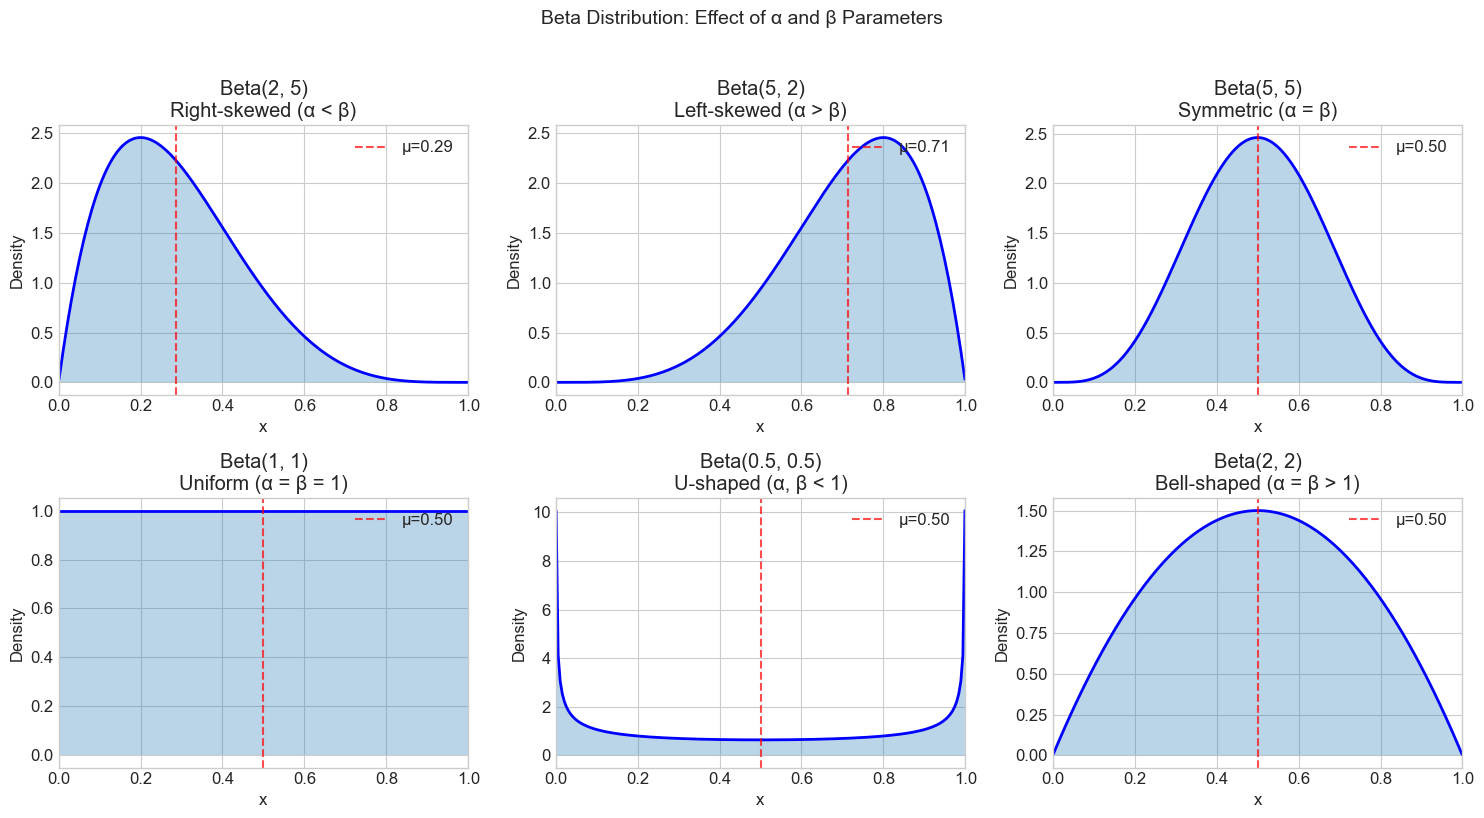

In [4]:
# Visualize different parameter combinations
x = np.linspace(0.001, 0.999, 200)  # Avoid boundary issues

params = [
    (2, 5, 'Right-skewed (α < β)'),
    (5, 2, 'Left-skewed (α > β)'),
    (5, 5, 'Symmetric (α = β)'),
    (1, 1, 'Uniform (α = β = 1)'),
    (0.5, 0.5, 'U-shaped (α, β < 1)'),
    (2, 2, 'Bell-shaped (α = β > 1)'),
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, (a, b, title) in zip(axes, params):
    pdf = stats.beta.pdf(x, a, b)
    ax.plot(x, pdf, 'b-', lw=2)
    ax.fill_between(x, pdf, alpha=0.3)
    ax.set_title(f'Beta({a}, {b})\n{title}')
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_xlim(0, 1)
    
    # Add mean line
    mean = a / (a + b)
    ax.axvline(mean, color='red', linestyle='--', alpha=0.7, label=f'μ={mean:.2f}')
    ax.legend(loc='upper right')

plt.suptitle('Beta Distribution: Effect of α and β Parameters', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Formulas

**Mean:** $\mu = \frac{\alpha}{\alpha + \beta}$

**Mode:** $\frac{\alpha - 1}{\alpha + \beta - 2}$ (when α, β > 1)

**Variance:** $\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

**Quick rule:** 
- α controls the left tail
- β controls the right tail
- Larger values → more concentrated (less variance)

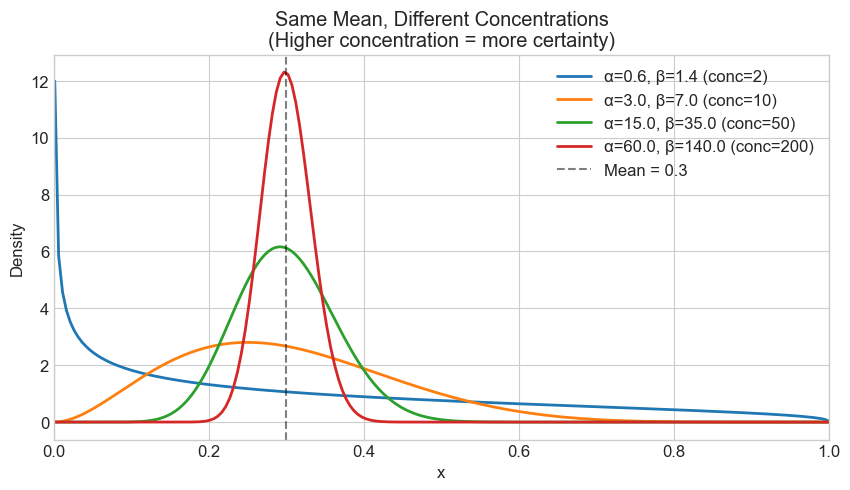

In [5]:
# Interactive exploration: varying concentration
# Same mean (0.3), different concentrations

target_mean = 0.3
concentrations = [2, 10, 50, 200]  # α + β

fig, ax = plt.subplots(figsize=(10, 5))

for c in concentrations:
    a = target_mean * c
    b = (1 - target_mean) * c
    pdf = stats.beta.pdf(x, a, b)
    ax.plot(x, pdf, lw=2, label=f'α={a:.1f}, β={b:.1f} (conc={c})')

ax.axvline(target_mean, color='black', linestyle='--', alpha=0.5, label=f'Mean = {target_mean}')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Same Mean, Different Concentrations\n(Higher concentration = more certainty)')
ax.legend()
ax.set_xlim(0, 1)
plt.show()

### Understanding Concentration (α + β)

The **concentration parameter** (also called **precision** or **sample size**) is the sum α + β. It controls how "concentrated" or "spread out" the distribution is around its mean.

**Key insight:** For a fixed mean μ, we can write:
- α = μ × (α + β) = μ × concentration
- β = (1 - μ) × (α + β) = (1 - μ) × concentration

**Interpretation:**
- **Low concentration** → high uncertainty (wide distribution)
- **High concentration** → high certainty (narrow distribution)

This is crucial in Bayesian statistics:
- Concentration acts like "effective sample size" of prior belief
- Higher concentration = stronger prior = harder to shift with new data

**Connection to Dirichlet Process:**
The concentration parameter appears in the Dirichlet distribution (multivariate generalization of Beta) and the Dirichlet Process, where it controls how "spread out" probability mass is across categories or clusters.

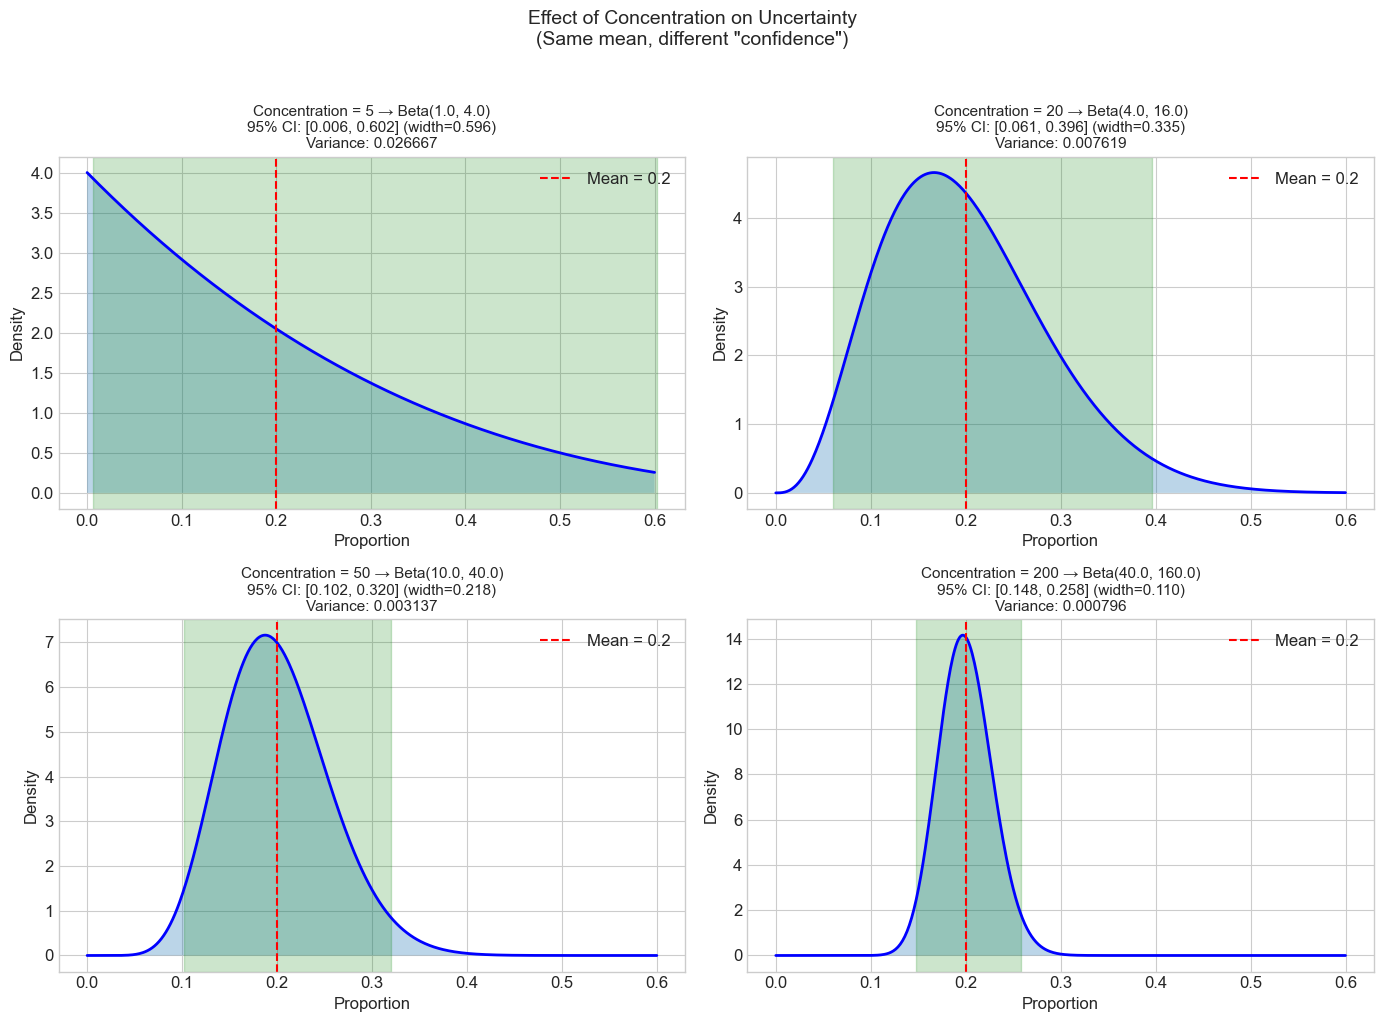

Concentration vs Credible Interval Width:
--------------------------------------------------
  Concentration   5: 95% CI width = 0.5961
  Concentration  20: 95% CI width = 0.3353
  Concentration  50: 95% CI width = 0.2178
  Concentration 200: 95% CI width = 0.1104


In [11]:
# Concentration in detail: how it affects uncertainty

expected_proportion = 0.20

# Different confidence levels (concentration)
confidences = [5, 20, 50, 200]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
x = np.linspace(0, 0.6, 500)

for ax, conf in zip(axes.flat, confidences):
    a = expected_proportion * conf
    b = (1 - expected_proportion) * conf
    
    pdf = stats.beta.pdf(x, a, b)
    ax.plot(x, pdf, 'b-', lw=2)
    ax.fill_between(x, pdf, alpha=0.3)
    ax.axvline(expected_proportion, color='red', linestyle='--', 
               label=f'Mean = {expected_proportion}')
    
    # Show credible interval
    ci_low, ci_high = stats.beta.ppf([0.025, 0.975], a, b)
    ax.axvspan(ci_low, ci_high, alpha=0.2, color='green')
    
    # Compute variance
    variance = (a * b) / ((a + b)**2 * (a + b + 1))
    
    ax.set_title(f'Concentration = {conf} → Beta({a:.1f}, {b:.1f})\n'
                 f'95% CI: [{ci_low:.3f}, {ci_high:.3f}] (width={ci_high-ci_low:.3f})\n'
                 f'Variance: {variance:.6f}',
                 fontsize=11)
    ax.set_xlabel('Proportion')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Effect of Concentration on Uncertainty\n(Same mean, different "confidence")', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Print summary
print("Concentration vs Credible Interval Width:")
print("-" * 50)
for conf in confidences:
    a = expected_proportion * conf
    b = (1 - expected_proportion) * conf
    ci_low, ci_high = stats.beta.ppf([0.025, 0.975], a, b)
    print(f"  Concentration {conf:3d}: 95% CI width = {ci_high - ci_low:.4f}")

## 3. Common Shapes and Use Cases

### Use Case 1: Modeling Proportions/Probabilities

The Beta distribution is the natural choice for modeling quantities bounded between 0 and 1:
- **Success rates** (conversion rate, click-through rate)
- **Proportions** (fraction of cells in a state)
- **Probabilities** (prior belief about a parameter)

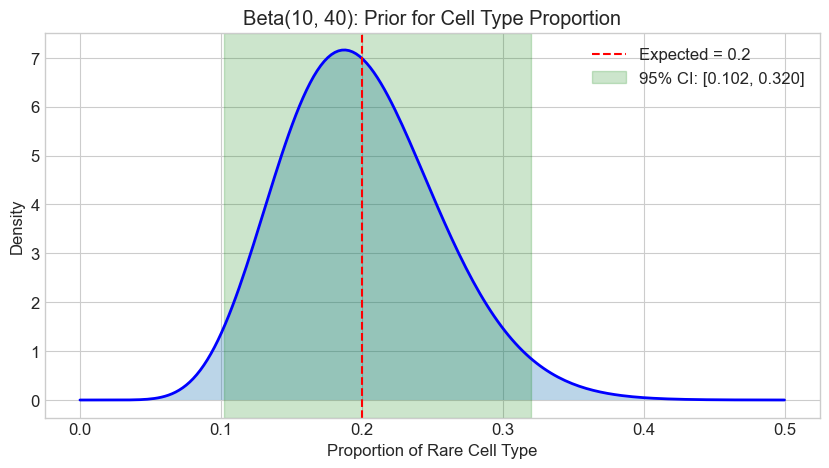

In [6]:
# Example: Modeling cell type proportions
# Suppose we expect ~20% of cells to be a rare cell type, with some uncertainty

expected_proportion = 0.20
confidence = 50  # Higher = more confident

a = expected_proportion * confidence
b = (1 - expected_proportion) * confidence

x = np.linspace(0, 0.5, 200)
pdf = stats.beta.pdf(x, a, b)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf, 'b-', lw=2)
plt.fill_between(x, pdf, alpha=0.3)
plt.axvline(expected_proportion, color='red', linestyle='--', label=f'Expected = {expected_proportion}')

# 95% credible interval
ci_low, ci_high = stats.beta.ppf([0.025, 0.975], a, b)
plt.axvspan(ci_low, ci_high, alpha=0.2, color='green', label=f'95% CI: [{ci_low:.3f}, {ci_high:.3f}]')

plt.xlabel('Proportion of Rare Cell Type')
plt.ylabel('Density')
plt.title(f'Beta({a:.0f}, {b:.0f}): Prior for Cell Type Proportion')
plt.legend()
plt.show()

### Use Case 2: Cell Cycle Phase Distribution

This is exactly what we use in `simulate_cell_cycle_confounding()`.

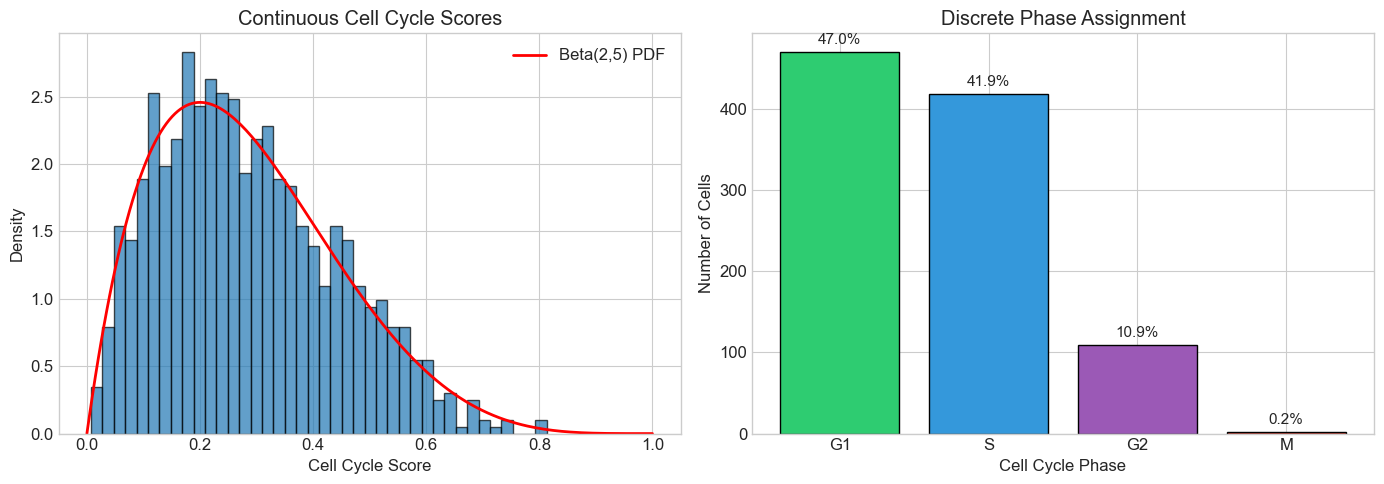

Phase distribution:
  G1: 470 cells (47.0%)
  S: 419 cells (41.9%)
  G2: 109 cells (10.9%)
  M: 2 cells (0.2%)


In [7]:
# Simulate cell cycle phases
np.random.seed(42)
n_cells = 1000

# Beta(2, 5) gives right-skewed distribution
cell_cycle_scores = np.random.beta(2, 5, n_cells)

# Assign discrete phases based on score
def assign_phase(score):
    if score < 0.25:
        return 'G1'
    elif score < 0.50:
        return 'S'
    elif score < 0.75:
        return 'G2'
    else:
        return 'M'

phases = [assign_phase(s) for s in cell_cycle_scores]

# Count
from collections import Counter
phase_counts = Counter(phases)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Continuous distribution
axes[0].hist(cell_cycle_scores, bins=40, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, 1, 200)
axes[0].plot(x, stats.beta.pdf(x, 2, 5), 'r-', lw=2, label='Beta(2,5) PDF')
axes[0].set_xlabel('Cell Cycle Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Continuous Cell Cycle Scores')
axes[0].legend()

# Discrete phases
phase_order = ['G1', 'S', 'G2', 'M']
counts = [phase_counts[p] for p in phase_order]
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
axes[1].bar(phase_order, counts, color=colors, edgecolor='black')
axes[1].set_xlabel('Cell Cycle Phase')
axes[1].set_ylabel('Number of Cells')
axes[1].set_title('Discrete Phase Assignment')

# Add percentages
for i, (phase, count) in enumerate(zip(phase_order, counts)):
    axes[1].text(i, count + 10, f'{count/n_cells*100:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("Phase distribution:")
for phase in phase_order:
    print(f"  {phase}: {phase_counts[phase]} cells ({phase_counts[phase]/n_cells*100:.1f}%)")

## 4. Bayesian Statistics: Beta as Conjugate Prior

The Beta distribution is the **conjugate prior** for the Bernoulli/Binomial likelihood. This means:

$$\text{Beta prior} + \text{Binomial data} = \text{Beta posterior}$$

### Example: Estimating Drug Response Rate

Suppose we're testing a new drug and want to estimate the response rate.

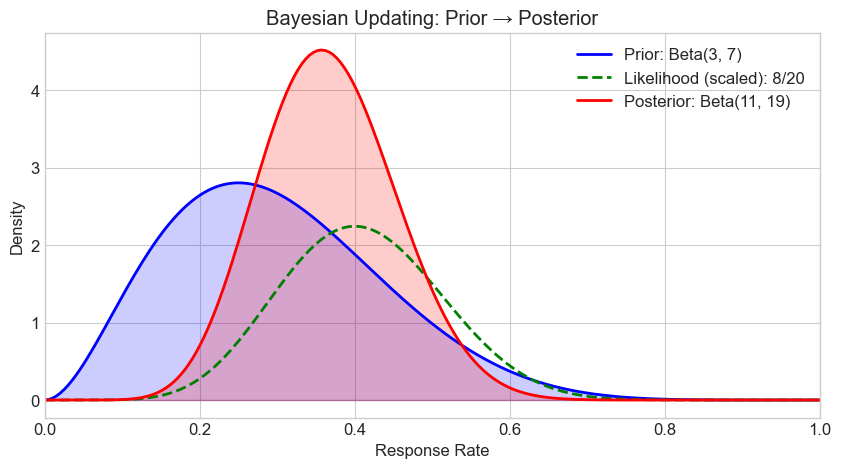

Prior:
  Mean: 0.300
  95% CI: [0.075, 0.600]

Data: 8/20 = 0.400

Posterior:
  Mean: 0.367
  95% CI: [0.207, 0.543]


In [8]:
# Bayesian updating example

# Prior: We expect ~30% response rate, but we're uncertain
prior_alpha = 3
prior_beta = 7

# Data: We observe 8 responders out of 20 patients
n_responders = 8
n_patients = 20

# Posterior (conjugate update)
posterior_alpha = prior_alpha + n_responders
posterior_beta = prior_beta + (n_patients - n_responders)

x = np.linspace(0, 1, 200)

fig, ax = plt.subplots(figsize=(10, 5))

# Prior
prior_pdf = stats.beta.pdf(x, prior_alpha, prior_beta)
ax.plot(x, prior_pdf, 'b-', lw=2, label=f'Prior: Beta({prior_alpha}, {prior_beta})')
ax.fill_between(x, prior_pdf, alpha=0.2, color='blue')

# Likelihood (scaled for visualization)
likelihood = stats.binom.pmf(n_responders, n_patients, x)
likelihood_scaled = likelihood / likelihood.max() * prior_pdf.max() * 0.8
ax.plot(x, likelihood_scaled, 'g--', lw=2, label=f'Likelihood (scaled): {n_responders}/{n_patients}')

# Posterior
posterior_pdf = stats.beta.pdf(x, posterior_alpha, posterior_beta)
ax.plot(x, posterior_pdf, 'r-', lw=2, label=f'Posterior: Beta({posterior_alpha}, {posterior_beta})')
ax.fill_between(x, posterior_pdf, alpha=0.2, color='red')

ax.set_xlabel('Response Rate')
ax.set_ylabel('Density')
ax.set_title('Bayesian Updating: Prior → Posterior')
ax.legend()
ax.set_xlim(0, 1)

plt.show()

# Summary statistics
print("Prior:")
print(f"  Mean: {prior_alpha / (prior_alpha + prior_beta):.3f}")
print(f"  95% CI: [{stats.beta.ppf(0.025, prior_alpha, prior_beta):.3f}, {stats.beta.ppf(0.975, prior_alpha, prior_beta):.3f}]")

print(f"\nData: {n_responders}/{n_patients} = {n_responders/n_patients:.3f}")

print(f"\nPosterior:")
print(f"  Mean: {posterior_alpha / (posterior_alpha + posterior_beta):.3f}")
print(f"  95% CI: [{stats.beta.ppf(0.025, posterior_alpha, posterior_beta):.3f}, {stats.beta.ppf(0.975, posterior_alpha, posterior_beta):.3f}]")

### Sequential Updating

One powerful feature of Bayesian inference: we can update our beliefs as new data arrives.

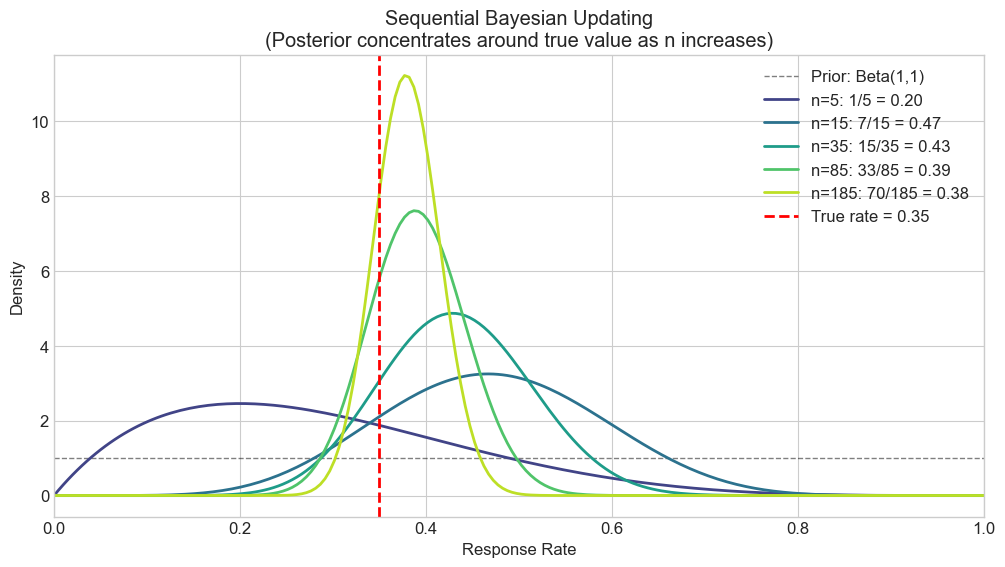

In [ ]:
# Sequential Bayesian updating
np.random.seed(42)

# True response rate (unknown to us)
true_rate = 0.35

# Prior
alpha, beta = 1, 1  # Uniform prior (no prior knowledge)

# Simulate data arriving in batches
batch_sizes = [5, 10, 20, 50, 100]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.linspace(0, 1, 200)

# Plot prior
ax.plot(x, stats.beta.pdf(x, alpha, beta), 'k--', lw=1, alpha=0.5, label='Prior: Beta(1,1)')

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(batch_sizes)))
cumulative_n = 0
cumulative_successes = 0

for i, batch_size in enumerate(batch_sizes):
    # Simulate new data
    new_successes = np.random.binomial(batch_size, true_rate)
    cumulative_n += batch_size
    cumulative_successes += new_successes
    
    # Update posterior
    alpha_new = alpha + cumulative_successes
    beta_new = beta + (cumulative_n - cumulative_successes)
    
    pdf = stats.beta.pdf(x, alpha_new, beta_new)
    ax.plot(x, pdf, color=colors[i], lw=2, 
            label=f'n={cumulative_n}: {cumulative_successes}/{cumulative_n} = {cumulative_successes/cumulative_n:.2f}')

ax.axvline(true_rate, color='red', linestyle='--', lw=2, label=f'True rate = {true_rate}')
ax.set_xlabel('Response Rate')
ax.set_ylabel('Density')
ax.set_title('Sequential Bayesian Updating\n(Posterior concentrates around true value as n increases)')
ax.legend(loc='upper right')
ax.set_xlim(0, 1)

plt.show()

## 5. Quick Reference

### Choosing α and β

| Goal | α | β | Example |
|------|---|---|--------|
| Uniform (no prior info) | 1 | 1 | Uninformative prior |
| Right-skewed (low values) | 2 | 5 | Cell cycle (most in G1) |
| Left-skewed (high values) | 5 | 2 | Success rate near 1 |
| Symmetric around 0.5 | 5 | 5 | Coin flip prior |
| U-shaped (extremes) | 0.5 | 0.5 | Jeffreys prior |

### Key Formulas

```
Mean = α / (α + β)
Mode = (α - 1) / (α + β - 2)  [when α, β > 1]
Variance = αβ / [(α + β)² (α + β + 1)]

Bayesian update:
  Prior: Beta(α, β)
  Data: k successes in n trials
  Posterior: Beta(α + k, β + n - k)
```

### Skewness Rule

- **α < β** → Right-skewed (mass toward 0)
- **α > β** → Left-skewed (mass toward 1)
- **α = β** → Symmetric

In [10]:
# Quick helper function for future use
def beta_summary(alpha, beta):
    """Print summary statistics for a Beta distribution."""
    dist = stats.beta(alpha, beta)
    print(f"Beta({alpha}, {beta}) Summary:")
    print(f"  Mean:     {dist.mean():.4f}")
    print(f"  Median:   {dist.median():.4f}")
    print(f"  Variance: {dist.var():.4f}")
    print(f"  Std Dev:  {dist.std():.4f}")
    if alpha > 1 and beta > 1:
        print(f"  Mode:     {(alpha - 1) / (alpha + beta - 2):.4f}")
    print(f"  95% CI:   [{dist.ppf(0.025):.4f}, {dist.ppf(0.975):.4f}]")
    
    # Skewness
    if alpha < beta:
        print(f"  Skew:     Right-skewed (mass toward 0)")
    elif alpha > beta:
        print(f"  Skew:     Left-skewed (mass toward 1)")
    else:
        print(f"  Skew:     Symmetric")

# Example usage
beta_summary(2, 5)

Beta(2, 5) Summary:
  Mean:     0.2857
  Median:   0.2644
  Variance: 0.0255
  Std Dev:  0.1597
  Mode:     0.2000
  95% CI:   [0.0433, 0.6412]
  Skew:     Right-skewed (mass toward 0)


---

## Summary

The Beta distribution is essential for:

1. **Modeling proportions/probabilities** bounded in [0, 1]
2. **Bayesian inference** as conjugate prior for binomial data
3. **Simulating realistic biological distributions** (e.g., cell cycle phases)

**For our confounding simulations:**
- `Beta(2, 5)` creates a right-skewed distribution
- Most cells are in early cell cycle (G1)
- This is biologically realistic and creates the confounding structure we want to demonstrate